Project Task work- You have to work on credit card data and apply all the things taught in our course eg, EDA, different plots, Model Application and all the things and lastly you have to draw confusion matrix and roc curve and also calculate auc score and maximize the accuracy of your models in whatever way you want.
You have to add proper comments so that your Code is understandable.

CSV GDrive Link:https://drive.google.com/file/d/1bVVyfUgi_hdxxRPE3MhPRhjgxIzQMWVh/view?usp=sharing





#  **Importing all the Necessary liabraries**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# As the Size of the dataset is large we will import it directly from the drive rather than uploading it time to time
(PS : you will be prompted for drive access)

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




> Reading the csv file and storing it with the help of pandas


In [ ]:
credit=pd.read_csv('/content/drive/MyDrive/creditcardfraud.csv')



> Displaying the first 5 rows of the data



In [ ]:
credit.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0



> Let's see the shape of our dataset (rows,columns)




In [ ]:
credit.shape

(555719, 23)

>Display basic information about the dataset


In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

> Display summary statistics


In [ ]:
credit.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000




> dropping duplicate values if there are any



In [ ]:
credit.duplicated().sum()

0

In [ ]:
credit.drop_duplicates()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


no duplicate rows were found.

>Dropping the unnamed : 0 column as there is no need for the counting

In [ ]:
credit.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
credit.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# Checking for missing values

In [ ]:
credit.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

No missing values in data.

> So no , need to drop na values

# Our Target Column is is_fraud '0' means no fraud '1' means fraud

> so lets check the total count of frauds and non frauds



In [ ]:
credit['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

# Plot class distribution for is_fraud column

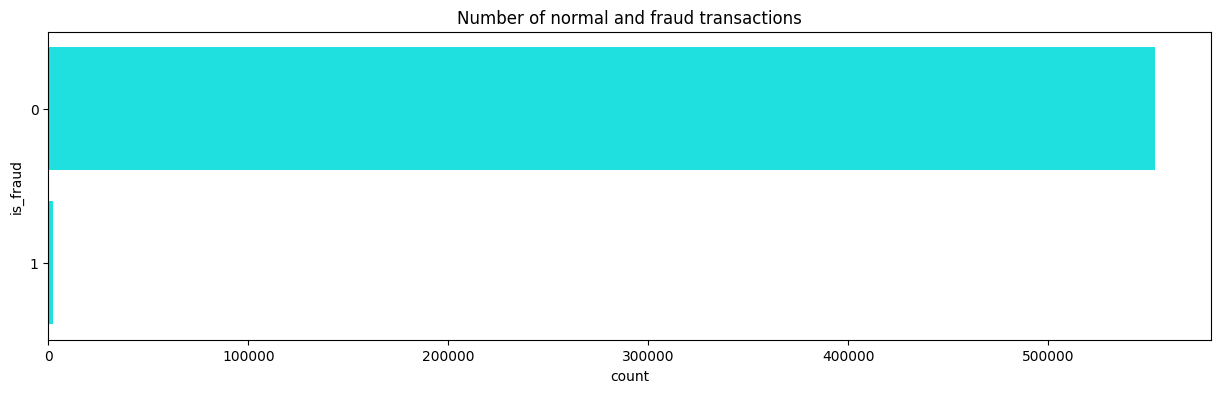

In [ ]:
plt.figure(figsize=(15,4))#(width,height)
sns.countplot(y='is_fraud', data=credit,color='cyan')
plt.title('Number of normal and fraud transactions')
plt.show()

# Plot class distribution for category column

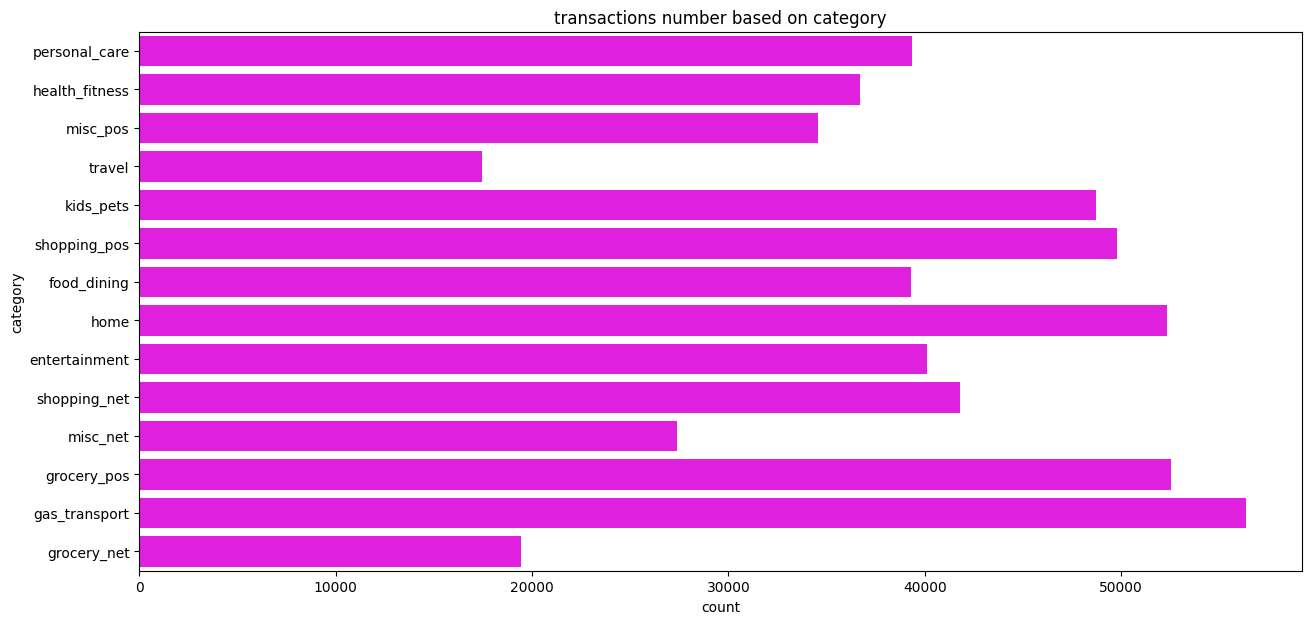

In [ ]:
plt.figure(figsize=(15,7))#(width,height)
sns.countplot(y='category', data=credit,color='magenta')
plt.title('transactions number based on category')
plt.show()

In [ ]:
count_of_fraud_by_gender=credit[credit['is_fraud']==1]['gender'].value_counts()
count_of_fraud_by_gender

gender
F    1164
M     981
Name: count, dtype: int64

# Frauds based on gender

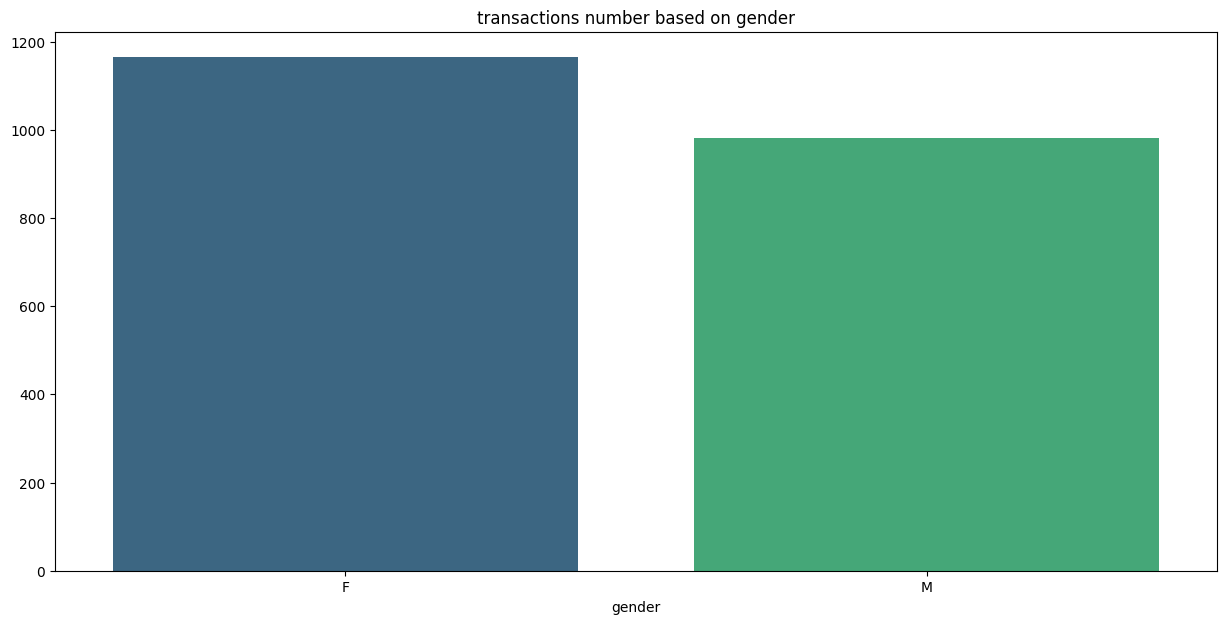

In [ ]:
plt.figure(figsize=(15,7))#(width,height)w
sns.barplot(x=count_of_fraud_by_gender.index,y=count_of_fraud_by_gender.values,palette='viridis')
plt.title('transactions number based on gender')
plt.show()

In [ ]:
count_of_fraud_by_merchant=credit[credit['is_fraud']==1]['merchant'].value_counts()
count_of_fraud_by_merchant

merchant
fraud_Romaguera, Cruickshank and Greenholt    18
fraud_Lemke-Gutmann                           18
fraud_Mosciski, Ziemann and Farrell           18
fraud_Schultz, Simonis and Little             17
fraud_Heathcote, Yost and Kertzmann           17
                                              ..
fraud_Dickinson-Rempel                         1
fraud_Lind-Buckridge                           1
fraud_Ernser-Feest                             1
fraud_Dicki Ltd                                1
fraud_Schulist Ltd                             1
Name: count, Length: 557, dtype: int64

In [ ]:
credit['category'].value_counts()

category
gas_transport     56370
grocery_pos       52553
home              52345
shopping_pos      49791
kids_pets         48692
shopping_net      41779
entertainment     40104
personal_care     39327
food_dining       39268
health_fitness    36674
misc_pos          34574
misc_net          27367
grocery_net       19426
travel            17449
Name: count, dtype: int64

In [ ]:
count_of_fraud_by_category=credit[credit['is_fraud']==1]['category'].value_counts()
count_of_fraud_by_category

category
shopping_net      506
grocery_pos       485
misc_net          267
shopping_pos      213
gas_transport     154
misc_pos           72
personal_care      70
home               67
kids_pets          65
entertainment      59
food_dining        54
health_fitness     52
grocery_net        41
travel             40
Name: count, dtype: int64

# Pie chart of category who has most frauds

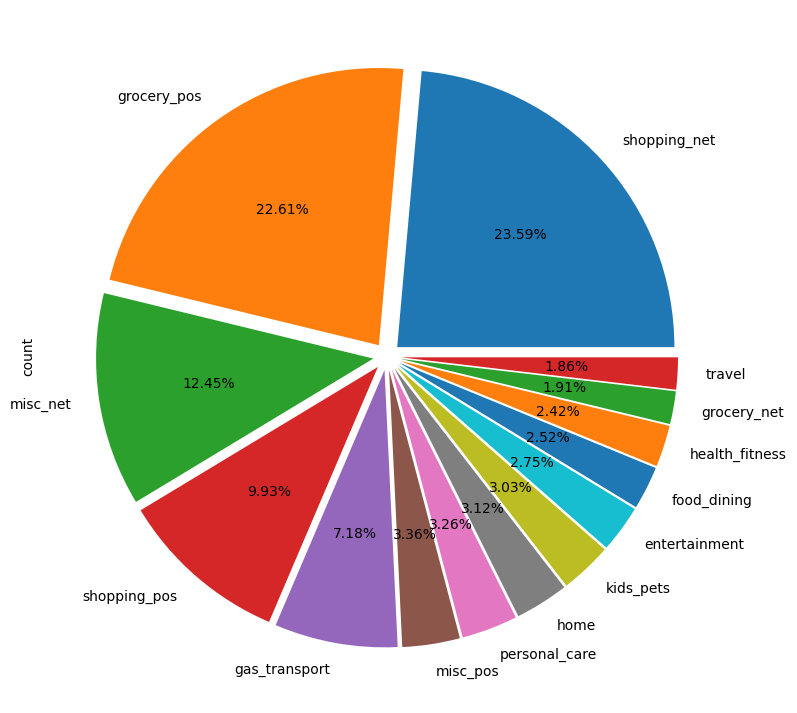

In [ ]:
explode=[0.05]*14
plt.figure(figsize=(18,9))#(width,height)w
count_of_fraud_by_category.plot(kind="pie",autopct='%.2f%%',explode=explode)
plt.show()

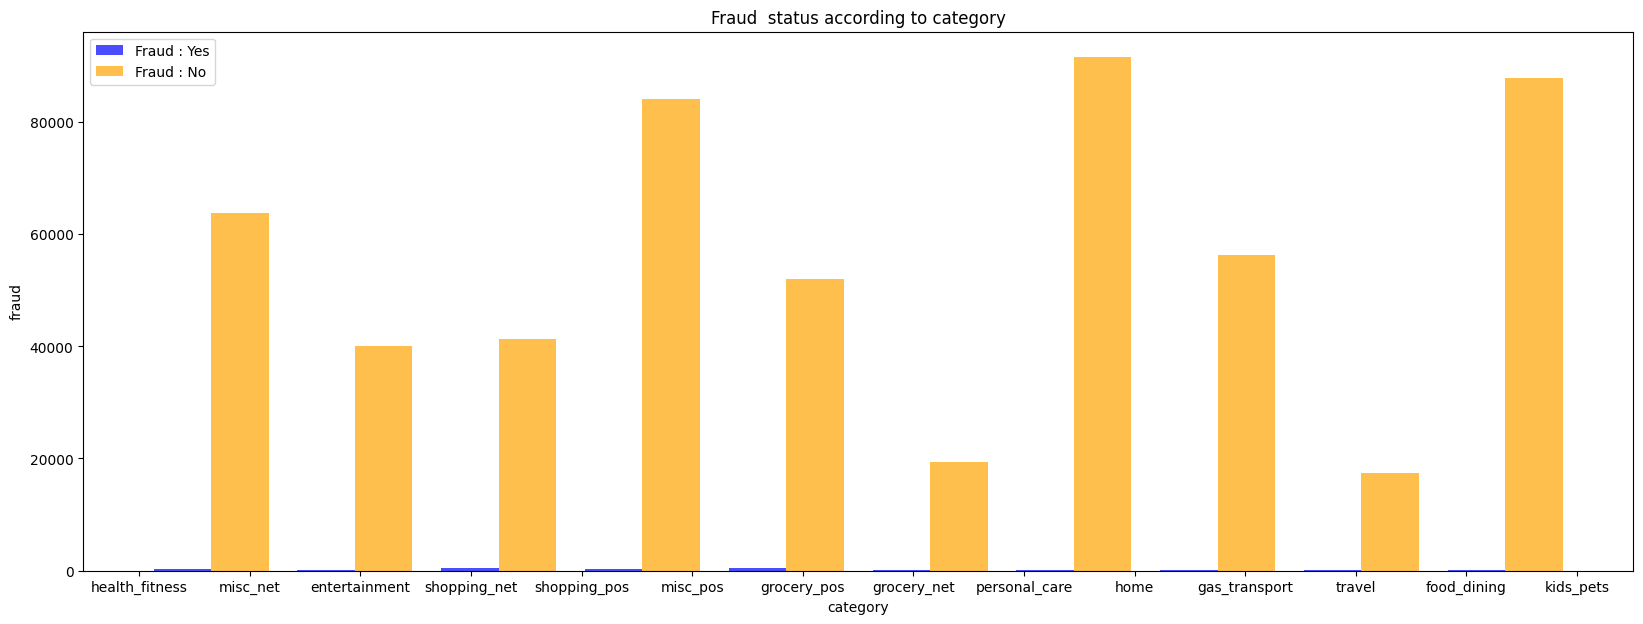

In [ ]:
side_category_fraud = credit[credit['is_fraud'] == 1]['category']
side_category_nofraud = credit[credit['is_fraud'] == 0]['category']
plt.figure(figsize=(20,7))#(width,height)
plt.hist([side_category_fraud ,side_category_nofraud ],bins=10, label=['Fraud : Yes', 'Fraud : No'], color=['blue', 'orange'], alpha=0.7)#density=True
plt.title('Fraud  status according to category')
plt.ylabel('fraud')
plt.xlabel('category')
plt.legend()
plt.show()
#change the y value or change plot ,yticks

In [ ]:
credit.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

# time series data using line graph

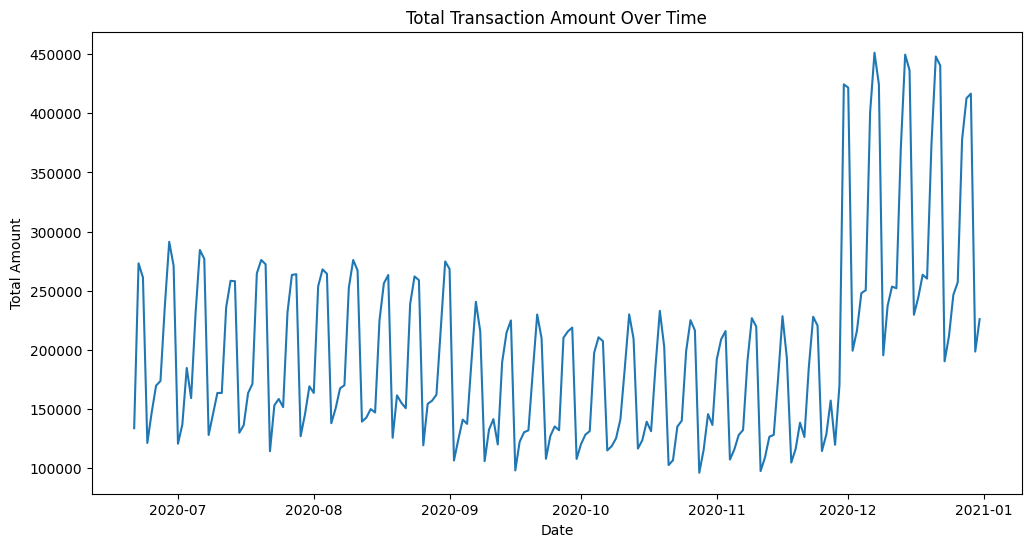

In [ ]:
credit['trans_date_trans_time'] = pd.to_datetime(credit['trans_date_trans_time'])
daily_amount = credit.groupby(credit['trans_date_trans_time'].dt.date)['amt'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_amount.index, daily_amount.values)
plt.title('Total Transaction Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.show()

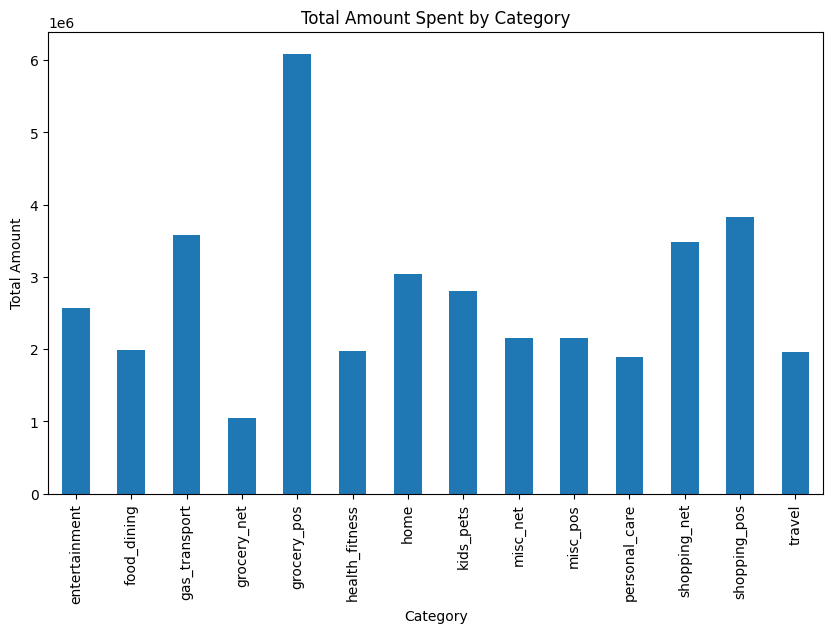

In [ ]:
category_amount = credit.groupby('category')['amt'].sum()

plt.figure(figsize=(10, 6))
category_amount.plot(kind='bar')
plt.title('Total Amount Spent by Category')
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.show()

# scatter plot based on longitude and latitude of transactions based on it

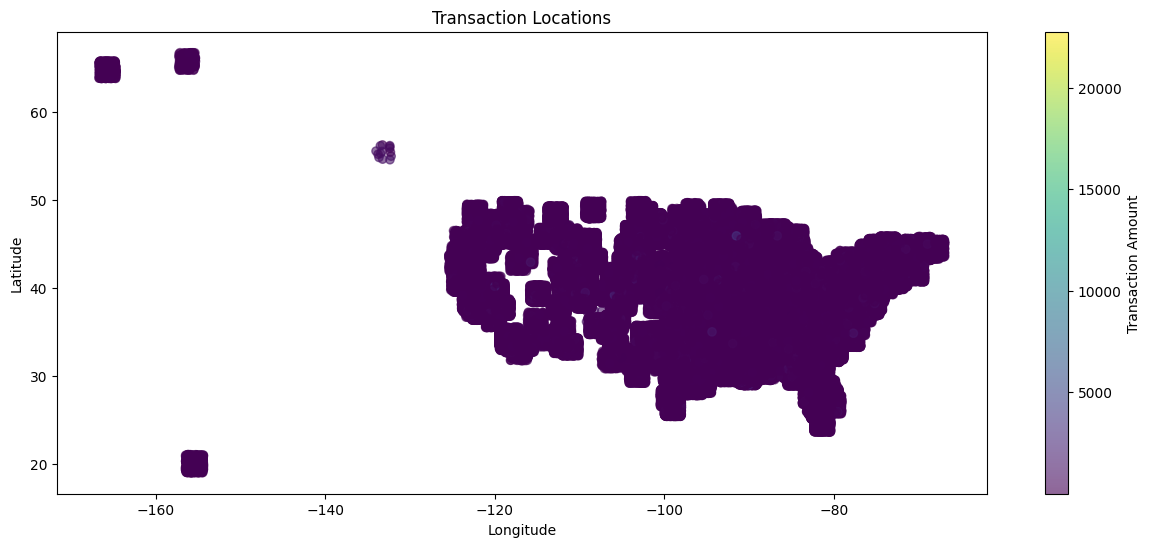

In [ ]:
plt.figure(figsize=(15, 6))
plt.scatter(credit['merch_long'], credit['merch_lat'], c=credit['amt'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Transaction Amount')
plt.title('Transaction Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

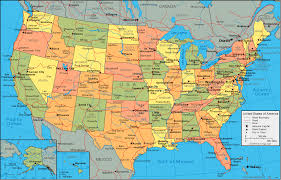

# copying the data , Changing datatype from obj to date

In [ ]:
df_copied = credit.copy()

In [ ]:
df_copied['trans_date_trans_time'] = pd.to_datetime(df_copied['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
df_copied['dob'] = pd.to_datetime(df_copied['dob'], format='%Y-%m-%d')

In [ ]:
df_copied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  int64         
 2   merchant               555719 non-null  object        
 3   category               555719 non-null  object        
 4   amt                    555719 non-null  float64       
 5   first                  555719 non-null  object        
 6   last                   555719 non-null  object        
 7   gender                 555719 non-null  object        
 8   street                 555719 non-null  object        
 9   city                   555719 non-null  object        
 10  state                  555719 non-null  object        
 11  zip                    555719 non-null  int64         
 12  lat                    555719 non-null  floa

# Dropping city and state because we have pincode and street has no meaning being there.

In [ ]:
df_copied.drop(columns= ['city','state'], axis=1, inplace=True)

In [ ]:
df_copied.drop(columns= ['street'], axis=1, inplace=True)
#dont drop street

# using label encoder to convert obj to int

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in df_copied.columns:
    if df_copied[col].dtype == 'object':
        df_copied[col] = label_encoder.fit_transform(df_copied[col])

In [ ]:
df_copied.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,319,10,2.86,151,115,1,29209,33.9659,-80.9355,333497,275,1968-03-19,98699,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,591,10,29.84,163,457,0,84002,40.3207,-110.4360,302,392,1990-01-17,108785,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,611,5,41.28,24,249,0,11710,40.6729,-73.5365,34496,259,1970-10-21,433979,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,222,9,60.05,42,457,1,32780,28.5697,-80.8191,54767,407,1987-07-25,71993,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,292,13,3.19,247,261,1,49632,44.2529,-85.0170,1126,196,1955-07-06,190585,1371816917,44.959148,-85.884734,0


In [ ]:
df_copied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  int64         
 2   merchant               555719 non-null  int64         
 3   category               555719 non-null  int64         
 4   amt                    555719 non-null  float64       
 5   first                  555719 non-null  int64         
 6   last                   555719 non-null  int64         
 7   gender                 555719 non-null  int64         
 8   zip                    555719 non-null  int64         
 9   lat                    555719 non-null  float64       
 10  long                   555719 non-null  float64       
 11  city_pop               555719 non-null  int64         
 12  job                    555719 non-null  int6

# taking only hour of transaction and year of birth for better access.

In [ ]:
df_copied['trans_date_trans_time'] = df_copied['trans_date_trans_time'].dt.hour
df_copied['dob'] = df_copied['dob'].dt.year

In [ ]:
df_copied.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

# scaling the data for better understanding of machines.

In [ ]:
colu_to_scale = df_copied.columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_copied[colu_to_scale] = scaler.fit_transform(df_copied[colu_to_scale])

In [ ]:
df_copied.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0.521739,0.000459,0.460983,0.769231,0.000082,0.444118,0.244681,1.0,0.283305,0.305255,0.867121,0.114727,0.576520,0.543210,0.177606,0.000000e+00,0.313922,0.857112,0.0
1,0.521739,0.000716,0.854046,0.769231,0.001267,0.479412,0.972340,0.0,0.838654,0.444423,0.565239,0.000096,0.821803,0.814815,0.195756,4.785402e-07,0.428589,0.568706,0.0
2,0.521739,0.000721,0.882948,0.384615,0.001769,0.070588,0.529787,0.0,0.105945,0.452136,0.942836,0.011860,0.542977,0.567901,0.780934,1.674891e-06,0.450526,0.927355,0.0
3,0.521739,0.000719,0.320809,0.692308,0.002594,0.123529,0.972340,1.0,0.319498,0.187080,0.868312,0.018834,0.853249,0.777778,0.129550,2.990876e-06,0.205343,0.860298,0.0
4,0.521739,0.000706,0.421965,1.000000,0.000096,0.726471,0.555319,1.0,0.490300,0.530537,0.825355,0.000379,0.410901,0.382716,0.342953,3.110511e-06,0.544191,0.810140,0.0


# Splitting Feature and target

In [ ]:
X = df_copied.drop('is_fraud' , axis = 'columns')
y = df_copied['is_fraud']

In [ ]:
# importing the train_test_split function to train and test data

from sklearn.model_selection import train_test_split
# seperating the data into 65:35 ratio with random state=2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

In [ ]:
X_train.shape

(361217, 18)

In [ ]:
X_test.shape

(194502, 18)

In [ ]:
y_train.shape

(361217,)

In [ ]:
y_test.shape

(194502,)

# Importing all Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score, f1_score

In [ ]:
logr = LogisticRegression()

In [ ]:
# fitting the training data into Logistic Regression
logr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logr.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
y_pre=pd.DataFrame(y_pred)


In [ ]:
y_pre.value_counts()

0.0    194490
1.0        12
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

is_fraud
0.0    193776
1.0       726
Name: count, dtype: int64

In [ ]:
# checking the training data score
logr.score(X_train, y_train)

0.9960190135015794

In [ ]:
# checking the testing data score
logr.score(X_test, y_test)

0.9962056945429867

In [ ]:
confusion_matrix(y_test,y_pred)

array([[193764,     12],
       [   726,      0]])

In [ ]:
print("accuracy score is: ",accuracy_score(y_test, y_pred))
print("precision scocre is: ",precision_score(y_test, y_pred))
print("recall score is: ",recall_score(y_test, y_pred))
print("f1 score is: " ,f1_score(y_test, y_pred))

accuracy score is:  0.9962056945429867
precision score is:  0.0
recall score is:  0.0
f1 score is:  0.0


# Decision tree classifier

In [ ]:
dtc=DecisionTreeClassifier(random_state=1)

In [ ]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter' : ['best','random'],
    'max_depth': [5,9,10]
}

In [ ]:
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy')


In [ ]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
best_params

{'criterion': 'entropy', 'max_depth': 9, 'splitter': 'best'}

In [ ]:
# Initialize the Decision Tree classifier with the best parameters
best_tree_model = DecisionTreeClassifier(**best_params, random_state=1)

# Train the model
best_tree_model.fit(X_train, y_train)

# Evaluate the model
best_tree_model.score(X_train, y_train)


0.9991113375062636

In [ ]:
best_tree_model.score(X_test, y_test)

0.9987917862027126

In [ ]:
y_pred=best_tree_model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
confusion_matrix(y_test,y_pred)

array([[193701,     75],
       [   160,    566]])

In [ ]:
print("accuracy score is: ",accuracy_score(y_test, y_pred))
print("precision scocre is: ",precision_score(y_test, y_pred))
print("recall score is: ",recall_score(y_test, y_pred))
print("f1 score is: " ,f1_score(y_test, y_pred))

accuracy score is:  0.9987917862027126
precision scocre is:  0.8829953198127926
recall score is:  0.7796143250688705
f1 score is:  0.8280907095830286


# BY applying DTC our accuracy increased from 99.6 to 99.8

In [ ]:
# applying SVC model
svc=SVC()

In [ ]:
svc.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
y_pred = svc.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# checking the training data score
svc.score(X_train, y_train)

0.9960190135015794

In [ ]:
# checking the testing data score
svc.score(X_test, y_test)

0.9962056945429867

# finding accuracy for all the models at once

In [ ]:
try_models = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),SVC()]

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score, f1_score
for model in try_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} :")
    confusion_matrix(y_test,y_pred)
    print(f"accuracy score is: {accuracy_score(y_test, y_pred)}")
    print(f"precision score is: {precision_score(y_test, y_pred)}")
    print(f"recall score is: {recall_score(y_test, y_pred)}")
    print(f"f1 score is: {f1_score}")

LogisticRegression :
accuracy score is: 0.9962056945429867
precision score is: 0.0
recall score is: 0.0
f1 score is: <function f1_score at 0x7c17aefa5360>
KNeighborsClassifier :
accuracy score is: 0.9962519665607552
precision score is: 0.47368421052631576
recall score is: 0.0371900826446281
f1 score is: <function f1_score at 0x7c17aefa5360>
DecisionTreeClassifier :
accuracy score is: 0.9979434658769576
precision score is: 0.7047738693467337
recall score is: 0.7727272727272727
f1 score is: <function f1_score at 0x7c17aefa5360>
RandomForestClassifier :
accuracy score is: 0.9986272634728691
precision score is: 0.9811320754716981
recall score is: 0.6446280991735537
f1 score is: <function f1_score at 0x7c17aefa5360>
SVC :
accuracy score is: 0.996267390566678
precision score is: 0.0
recall score is: 0.0
f1 score is: <function f1_score at 0x7c17aefa5360>


# As you can see the highest accuracy is of random forest classifier that is of 99.86

# but as you can see earlier for decision tree classifier when parameters are :{'criterion': 'entropy', 'max_depth': 9, 'splitter': 'best'} accuracy score is:  0.9987917862027126

# the accuracy of gradient boosting is 99.62 see below
## image below

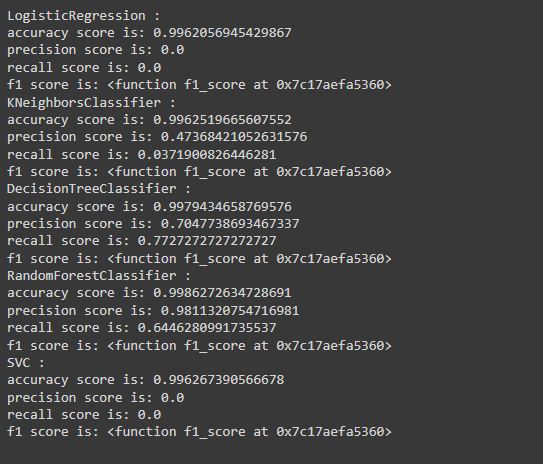

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc=GradientBoostingClassifier(random_state=1)

In [ ]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
gbc.score(X_train,y_train)

0.9982309802694779

In [ ]:
y_pred = gbc.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
gbc.score(X_test,y_test)

0.9982570873307215

In [ ]:
confusion_matrix(y_test,y_pred)

array([[193707,     69],
       [   270,    456]])

In [ ]:
print("accuracy score is: ",accuracy_score(y_test, y_pred))
print("precision scocre is: ",precision_score(y_test, y_pred))
print("recall score is: ",recall_score(y_test, y_pred))
print("f1 score is: " ,f1_score(y_test, y_pred))

accuracy score is:  0.9982570873307215
precision scocre is:  0.8685714285714285
recall score is:  0.628099173553719
f1 score is:  0.7290167865707435


# SO to conclude we can say that Decision Tree classifier when parameters are :{'criterion': 'entropy', 'max_depth': 9, 'splitter': 'best'} is best for the dataset for max accuracy that is of accuracy score is:  99.8791786202712

In [ ]:
#try xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg=XGBClassifier(base_esimator=dtc)

In [ ]:
xg.fit(X_train,y_train)

XGBClassifier(base_esimator=DecisionTreeClassifier(random_state=1),
              base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
xg.score(X_train,y_train)

0.9999640105532132

In [ ]:
xg.score(X_test,y_test)

0.9991002663211689

In [ ]:
y_pred = xg.predict(X_test)

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.91%
